<a href="https://colab.research.google.com/github/MarcosAcostaEsteban/mates/blob/main/Copia_de_practica_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2. Grafos

## Práctica 2.1
**Algoritmo de Dijkstra**

1. Mira estos vídeos:
 * [Algoritmo de DIJKSTRA ruta corta](https://youtu.be/6rl0ghgPfK0)
 * [Ruta mas corta en una red, algoritmo de Dijkstra](https://youtu.be/rh02c7v3EKY)
2. ¿Qué utilidad tiene el algoritmo?
3. Explique el algoritmo.
4. De un ejemplo de un grafo resuelto con el algoritmo de Dijkstra.
* Muestre la imagen del grafo con sus:
  - nodos
  - aristas (con flecha si son orientadas)
  - pesos (distancias o costes)
* Muestre nuevamente la imagen del grafo pero en esta ocasión con la solución.

2- Con el algoritmo de Dijkstra, puedes encontrar la via más corta o el camino más corto entre los nodos de un grafo. Específicamente, puedes encontrar el camino más corto desde un nodo (llamado el nodo de origen) a todos los otros nodos del grafo, generando un árbol del camino más corto.  3- El algoritmo de Dijkstra permite encontrar la distancia mínima entre un vértice dado de un grafo no dirigido, y cualquiera otro de sus vértices. No funciona sin embargo si la ponderación entre dos elementos es negativa, es sólo para grafos donde el coste de unir dos nodos cualesquiera es siempre mayor o igual que cero.
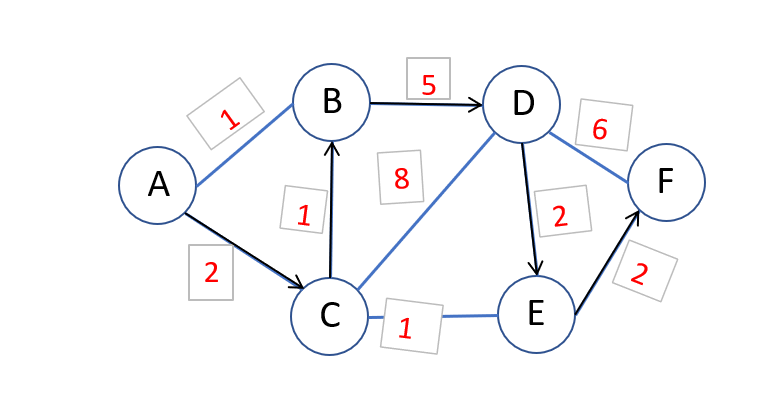

## Práctica 2.2
Vea el video:

* [Camino mas corto Solver](https://youtu.be/LYeMWlTfOgA)

Se pide:  
1. Replique en un archivo de Excel el caso del vídeo, en la Hoja 1. En el método de resolución de Solver elija el método Simplex.
2. En la Hoja 2, aplique esa metodología usando Solver a otro grafo de su invención. Dibuje el grafo, con sus nodos, flechas y pesos, y resuélvalo.
3. Suba el archivo de Excel creado a la tarea del Aula Virtual.

## Práctica 2.3
1. Muestre el enlace a alguna página donde se de el algoritmo de Dijkstra programado en **Python**.
2. Pruebe su código con algún grafo de ejemplo.

https://colab.research.google.com/drive/1GMZmnafCmK0y0KewaGEuzmTR1N3XF-yn#scrollTo=MRSLLXQayQ3Y

In [ ]:
import sys
from heapq import heappop, heappush
 
 
# Una clase para almacenar un nodo de heap
class Node:
    def _init_(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight
 
    # Anule la función _lt_() para hacer que la clase `Node` funcione con un min-heap
    def _lt_(self, other):
        return self.weight < other.weight
 
 
# Una clase para representar un objeto graph
class Graph:
    def _init_(self, edges, n):
        # asigna memoria para la lista de adyacencia
        self.adjList = [[] for _ in range(n)]
 
        # agrega bordes al graph dirigido
        for (source, dest, weight) in edges:
            self.adjList[source].append((dest, weight))
 
 
def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)
 
 
# Ejecutar el algoritmo de Dijkstra en un graph dado
def findShortestPaths(graph, source, n):
 
    # crea un min-heap y empuja el nodo de origen con una distancia de 0
    pq = []
    heappush(pq, Node(source))
 
    # establece la distancia inicial desde la fuente a `v` como infinito
    dist = [sys.maxsize] * n
 
    # distancia de la fuente a sí mismo es cero
    dist[source] = 0
 
    # Lista # para rastrear vértices para los cuales ya se encontró el costo mínimo
    done = [False] * n
    done[source] = True
 
    # almacena el predecesor de un vértice (en una ruta de impresión)
    prev = [-1] * n
 
    # se ejecuta hasta que el min-heap esté vacío
    while pq:
 
        node = heappop(pq)      # Quitar y devolver el mejor vértice
        u = node.vertex         # obtener el número de vértice
 
        # hacer para cada vecino `v` de `u`
        for (v, weight) in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:        # Escalón de relajación
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, Node(v, dist[v]))
 
        # marca el vértice `u` como hecho para que no se vuelva a recoger
        done[u] = True
 
    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f'Path ({source} —> {i}): Minimum cost = {dist[i]}, Route = {route}')
            route.clear()
 
 
if _name_ == '_main_':
 
    # inicializa los bordes según el diagrama anterior
    # (u, v, w) representa la arista del vértice `u` al vértice `v` con peso `w`
    edges = [(0, 1, 10), (0, 4, 3), (1, 2, 2), (1, 4, 4), (2, 3, 9), (3, 2, 7),
            (4, 1, 1), (4, 2, 8), (4, 3, 2)]
 
    # número total de nodos en el graph (etiquetados de 0 a 4)
    n = 5
 
    # graph de construcción
    graph = Graph(edges, n)
 
    # ejecuta el algoritmo de Dijkstra desde cada nodo
    for source in range(n):
        findShortestPaths(graph, source, n)

NameError: ignored

## Práctica 2.4
* Dibuja un grafo que tenga un mínimo de 6 nodos
* Crea en **Python** su **matriz de adyacencia**
* Crea en Python su **lista de adyacencia**
* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.
* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.
* Usando Python, suma todos los valores de la matriz
* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.
* Dibuja el grafo del ejemplo que se usa en este código.

In [ ]:
def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = len(matrix)
    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i]==1:
                res[start].append(i)
        start +=1
    return res

matrix =[[0,1,1,1,0,1,1,0,0],[1,0,0,1,0,0,1,1,0],[1,0,0,1,0,0,0,0,0],[1,1,1,0,1,0,0,0,0],[0,0,0,1,0,1,0,0,1],[1,0,0,0,1,0,0,0,1],[1,1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0]]
print(convert_to_adjacency(matrix))

[[1, 2, 3, 5, 6], [0, 3, 6, 7], [0, 3], [0, 1, 2, 4], [3, 5, 8], [0, 4, 8], [0, 1], [1], [4, 5]]


In [ ]:
def convert_to_matrix(graph):
    matrix =[]
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j]=1
    return matrix

lst =[[1,2,3,5,6],[0,3,6,7],[0,3],[0,1,2,4],[3,5,8],[0,4,8],[0,1],[1],[4,5]]
print(convert_to_matrix(lst))

[[0, 1, 1, 1, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0]]


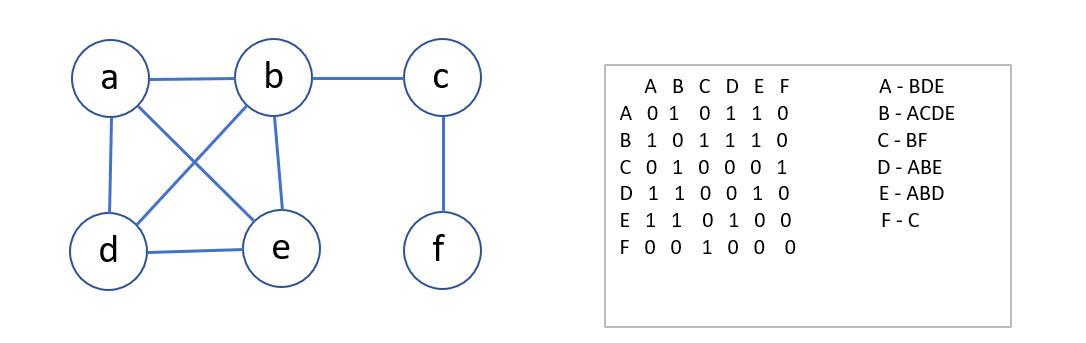

Son todos 0 en la diagonal principal ya que no puede ir un número consigo mismo.
Si es una matriz simétrica ya que tiene el mismo numero de filas y de columnas.No seria simetrica si no tuviese el mismo numero de filas que de columnas.

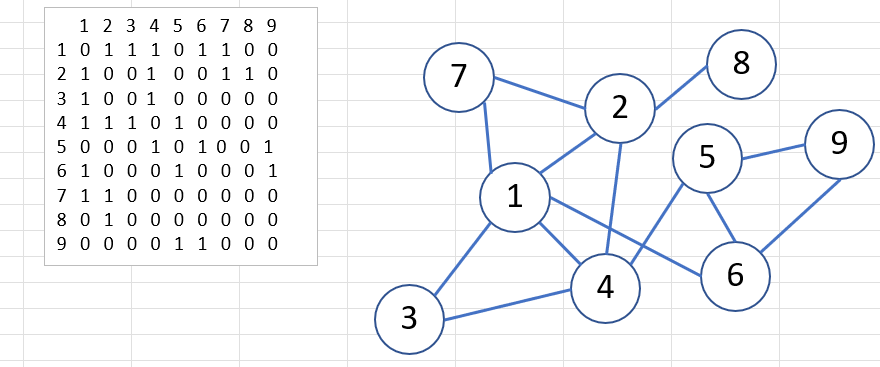

Son todos 0 en la diagonal principal ya que no puede ir un número consigo mismo.
Si es una matriz simétrica ya que tiene el mismo numero de filas y de columnas.No seria simetrica si no tuviese el mismo numero de filas que de columnas.

## Práctica 2.5
**Árboles binarios**
* Mira este vídeo: [¿Qué son los ÁRBOLES BINARIOS y por qué son tan geniales?](https://youtu.be/lMTaNbJAqvM)
* ¿Qué son los **árboles binarios de búsqueda**? (en inglés: BST (Binary Search Tree))
* Mira este vídeo: [Recorrido de Árboles Binarios](https://youtu.be/WCiwBrj8EQY)
* Qué significa recorrer el árbol en:
 - preorden
 - inorden
 - postorden
* Al BST del vídeo anterior añadele dos nodos de tu elección, de forma que continúe siendo un BST, dibujalo (poniendo en color azul claro los dos nodos nuevos) y da su recorrido en:
 - preorden
 - inorden (observa que en este caso los nodos deben quedar **ordenados** de menor a mayor)
 - postorden
* ¿Por qué los BST son importantes en ciencias de la computación?
* Pon un link a una página o vídeo que trate este tema en **Python**.
* ¿Has probado el código en Python que comentas? ¿Funciona con el BST que has puesto como ejemplo?

## Práctica 2.6
* ¿Qué es un **camino hamiltoniano**?
* Pon un ejemplo
* Dibújalo
* Resulevelo
* ¿Qué utilidad tiene?
* Muestra los enlaces a un par de vídeos que hablen de ello

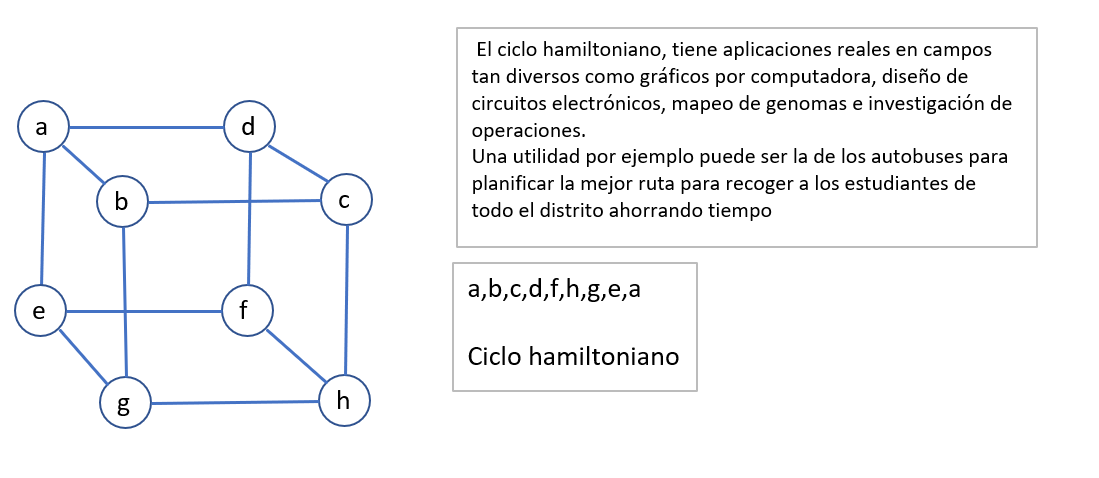

enlaces: https://statologos.com/ciclo-hamiltoniano/ ; https://1library.co/article/caminos-eulerianos-hamiltonianos-teor%C3%ADa-grafos-aplicaciones.q2kw8e2q

## Práctica 2.7
* Mira este vídeo:
 - [Un problema matemático de ciudades y carreteras](https://youtu.be/kwU1uIbylsM)
* Dibuja el grafo y da tu solución

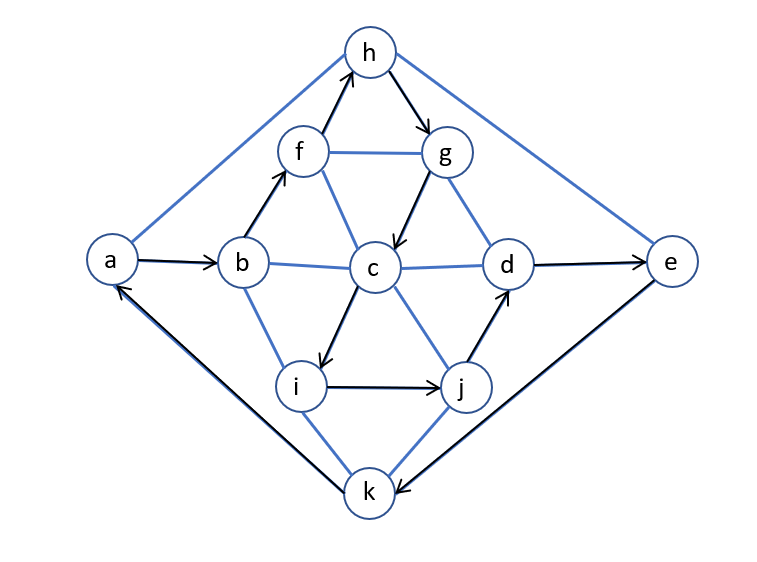

abfhgcijdeka

## Práctica 2.8
* El problema de **los puentes de Königsberg**
* Describe el problema
* Muestra una imagen del grafo resultante
* Quién fue *Euler* y qué hizo para resolver el problema

PROBLEMA DE LOS PUENTES DE KÖNIGSBERG. Durante el Siglo XVIII, la ciudad de Königsberg, en Prusia 
Oriental estaba dividida en cuatro zonas por el río Pregel. Había siete puentes que comunicaban estas 
regiones, tal y como se muestra en el dibujo. Los habitantes de la ciudad hacían paseos dominicales 
tratando de encontrar una forma de caminar por la ciudad, cruzando cada puente una sola vez, y regresando 
al lugar de partida.
Euler, un matematico y fisico suizo, demostró que no era posible una ruta de estas características. Para ello, representó las cuatro zonas 
como cuatro puntos, y los puentes como aristas que unen los puntos.os objetos de los que trata cada problema (ciudades, personas, etc.) serán lo que llamaremos vértices del 
grafo. Para hacer la situación más obvia, se pueden dibujar como puntos en el plano. La representación 
visual del grafo puede ser útil para entender mejor el concepto. Conectaremos vértices que estén 
relacionados entre sí (ciudades unidas por carreteras, personas relacionadas entre sí por apretones de 
manos, etc.) por líneas llamadas aristas.


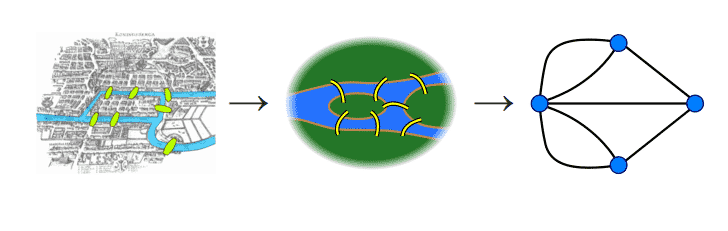

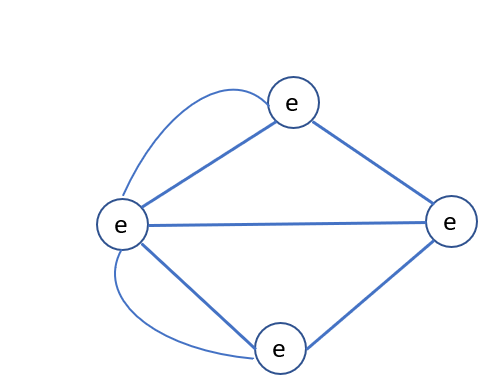

## Práctica 2.9
* ¿Qué son los **caminos eulerianos**?
* ¿Qué son los **ciclos eulerianos**?
* Da los enlaces a dos vídeos que hablen de ello
* Dibuja un par de casos

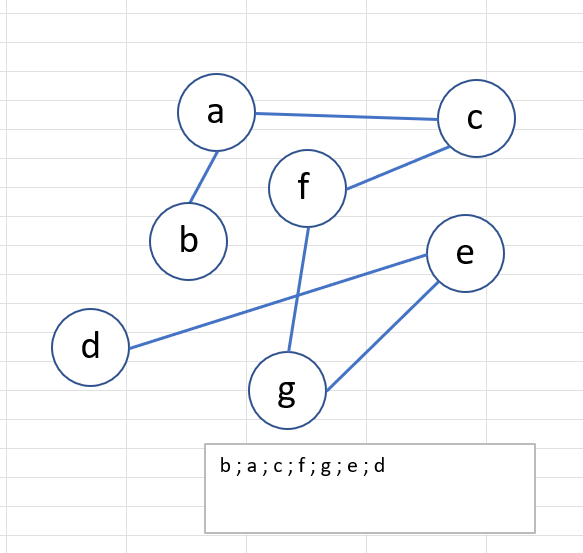

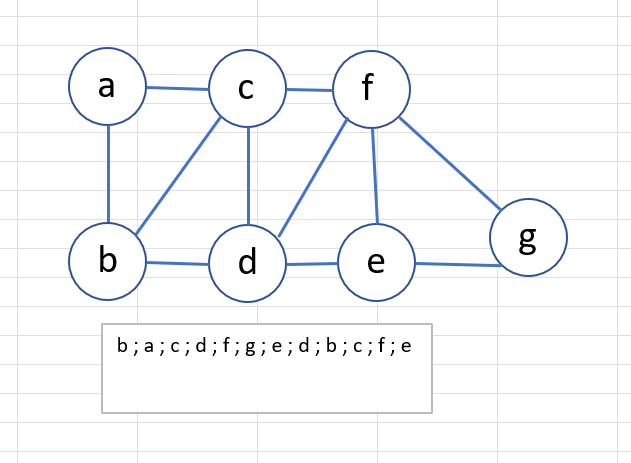

Enlaces: https://www.youtube.com/watch?v=w8d-4FyrbYk ; https://www.youtube.com/watch?v=57yhBHFCb7w

Un ciclo hamiltoniano es un ciclo que pasa por todos los vértices de un grafo. Un camino euleriano es un camino que pasa por cada arista una y solo una vez.

## Práctica 2.10
* Mira estos vídeos:
 - [¿Puedes dibujarlo sin despegar el lápiz?](https://youtu.be/IZ0-xFrlvag)
 - [USA esta LÓGICA cuando NO PUEDAS con un PROBLEMA](https://youtu.be/5Ncb7eU0LkQ)
* Caso 1: dibuja un grafo en el que si sea posible y resuélvelo
* Caso 2: dibuja un grafo en el que no sea posible y di el motivo

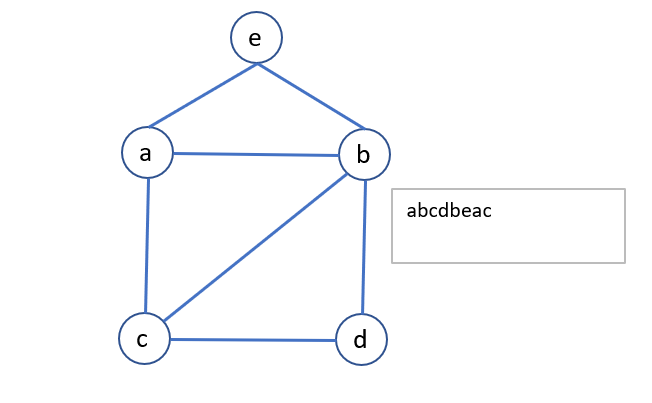

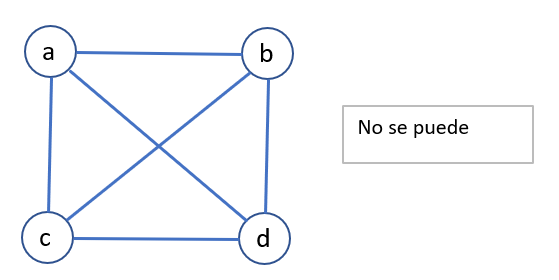

Este no es posible ya que el número de vertices es par y no se puede levantar el lapiz ni pasar por la misma arista